In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

! pip install xlrd --user

In [57]:
#df = pd.read_excel('/home/jovyan/work/datasets/default of credit card clients.xls',header=None)
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls',header=None)
col_names = ["ID", "LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE", "PAY0", "PAY2", "PAY3", "PAY4", "PAY5", "PAY6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6", "DEF_PAY_NE_MNTH"]
df.columns = col_names


In [59]:
df=df.drop([0, 1])

In [60]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY0,PAY2,PAY3,PAY4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NE_MNTH
2,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
3,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
4,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
5,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
6,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [61]:
df.DEF_PAY_NE_MNTH.unique()
df["DEF_PAY_NE_MNTH"] = df["DEF_PAY_NE_MNTH"].astype('int')

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 2 to 30001
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               30000 non-null  object
 1   LIMIT_BAL        30000 non-null  object
 2   SEX              30000 non-null  object
 3   EDUCATION        30000 non-null  object
 4   MARRIAGE         30000 non-null  object
 5   AGE              30000 non-null  object
 6   PAY0             30000 non-null  object
 7   PAY2             30000 non-null  object
 8   PAY3             30000 non-null  object
 9   PAY4             30000 non-null  object
 10  PAY5             30000 non-null  object
 11  PAY6             30000 non-null  object
 12  BILL_AMT1        30000 non-null  object
 13  BILL_AMT2        30000 non-null  object
 14  BILL_AMT3        30000 non-null  object
 15  BILL_AMT4        30000 non-null  object
 16  BILL_AMT5        30000 non-null  object
 17  BILL_AMT6        30000 non-null

In [62]:
# Here we turn into numpy arrays
#Skip ID for standardization of data
X_bin = df.iloc[:,1:24].values
y_bin = df.iloc[:,24:].values.ravel()

In [63]:
y_bin

array([1, 1, 0, ..., 1, 1, 1])

In [64]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, random_state=42)

In [65]:
y_train.shape

(22500,)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe1 = make_pipeline(StandardScaler(), LogisticRegression())
pipe1.fit(X_train, y_train)  # apply scaling on training data
#Pipeline(steps=[('standardscaler', StandardScaler()),
#                ('logisticregression', LogisticRegression())])

print("Training set score1: {:.3f}".format(pipe1.score(X_train, y_train)))
print("Test set score1: {:.3f}".format(pipe1.score(X_test, y_test)))

Training set score1: 0.812
Test set score1: 0.809


In [67]:
pipe100 = make_pipeline(StandardScaler(), LogisticRegression(C=100))
pipe100.fit(X_train, y_train)  # apply scaling on training data
#Pipeline(steps=[('standardscaler', StandardScaler()),
#                ('logisticregression', LogisticRegression())])

print("Training set score100: {:.3f}".format(pipe100.score(X_train, y_train)))
print("Test set score100: {:.3f}".format(pipe100.score(X_test, y_test)))

Training set score100: 0.812
Test set score100: 0.809


In [68]:
pipe001 = make_pipeline(StandardScaler(), LogisticRegression(C=0.01))
pipe001.fit(X_train, y_train)  # apply scaling on training data
#Pipeline(steps=[('standardscaler', StandardScaler()),
#                ('logisticregression', LogisticRegression())])

print("Training set score001: {:.3f}".format(pipe001.score(X_train, y_train)))
print("Test set score001: {:.3f}".format(pipe001.score(X_test, y_test)))

Training set score001: 0.809
Test set score001: 0.809


In [69]:
pipe0001 = make_pipeline(StandardScaler(), LogisticRegression(C=0.001))
pipe0001.fit(X_train, y_train)  # apply scaling on training data
#Pipeline(steps=[('standardscaler', StandardScaler()),
#                ('logisticregression', LogisticRegression())])

print("Training set score0001: {:.3f}".format(pipe0001.score(X_train, y_train)))
print("Test set score0001: {:.3f}".format(pipe0001.score(X_test, y_test)))

Training set score0001: 0.803
Test set score0001: 0.801


In [70]:
pipe005 = make_pipeline(StandardScaler(), LogisticRegression(C=0.05))
pipe005.fit(X_train, y_train)  # apply scaling on training data
#Pipeline(steps=[('standardscaler', StandardScaler()),
#                ('logisticregression', LogisticRegression())])

print("Training set score005: {:.3f}".format(pipe005.score(X_train, y_train)))
print("Test set score005: {:.3f}".format(pipe005.score(X_test, y_test)))

Training set score005: 0.811
Test set score005: 0.809


In [71]:
from sklearn.tree import DecisionTreeClassifier

#X_train, X_test, y_train, y_test = train_test_split(X_bin,y_bin, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.732


In [72]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.824
Accuracy on test set: 0.821


In [73]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.820
Accuracy on test set: 0.820


In [74]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.847
Accuracy on test set: 0.812


In [75]:
tree = DecisionTreeClassifier(max_depth=25, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.975
Accuracy on test set: 0.749


In [76]:
# logistic regression dataset

training_accuracy = []
test_accuracy = []

# record training set accuracy
training_accuracy.append("Training set score0001")
training_accuracy.append("Training set score001")
training_accuracy.append("Training set score005")
training_accuracy.append("Training set score1")
training_accuracy.append("Training set score100")
# record generalization accuracy
test_accuracy.append("Test set score0001")
test_accuracy.append("Test set score001")
test_accuracy.append("Test set score005")
test_accuracy.append("Test set score1")
test_accuracy.append("Test set score100")

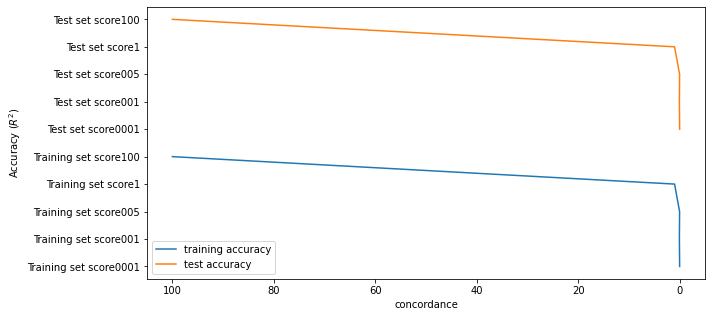

In [77]:
C = [0.001, 0.05, 0.01, 1, 100]
plt.figure(figsize=(10,5))
plt.plot(C, training_accuracy, label="training accuracy")
plt.plot(C, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy ($R^2$)")
plt.xlabel("concordance")
plt.gca().invert_xaxis()
plt.legend()